In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [2]:
df = pd.read_csv("C:/Users/Srii/Downloads/Stock price.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [4]:
copy = df.copy()

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(1009, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [10]:
training, testing = train_test_split(df, test_size = 0.2)

In [11]:
test_prediction = testing.copy()

In [12]:
training.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
328,2019-05-28,354.390015,361.200012,353.649994,355.059998,355.059998,4717100
448,2019-11-14,283.250000,290.630005,283.220001,289.619995,289.619995,6529000
709,2020-11-27,486.579987,493.250000,481.850006,491.359985,491.359985,2805800
801,2021-04-13,557.000000,559.750000,550.299988,553.729980,553.729980,2720300
158,2018-09-20,370.260010,370.260010,363.170013,365.359985,365.359985,6768100
137,2018-08-21,331.000000,341.500000,329.700012,338.019989,338.019989,14783200
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
334,2019-06-05,354.380005,357.880005,348.709991,355.730011,355.730011,5020100
733,2021-01-04,539.000000,540.799988,515.090027,522.859985,522.859985,4444400
406,2019-09-17,294.500000,299.149994,291.790009,298.600006,298.600006,4777100


In [13]:
testing.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
27,2018-03-15,323.170013,323.399994,318.140015,321.089996,321.089996,5642900
349,2019-06-26,361.600006,366.790009,361.600006,362.200012,362.200012,3669700
362,2019-07-16,370.089996,371.339996,364.920013,365.989990,365.989990,5863200
35,2018-03-27,322.489990,322.899994,297.000000,300.690002,300.690002,12068600
43,2018-04-09,291.769989,299.549988,289.119995,289.929993,289.929993,9853600
201,2018-11-20,254.630005,276.339996,250.000000,266.980011,266.980011,16693800
891,2021-08-19,522.739990,548.390015,521.869995,543.710022,543.710022,7497300
532,2020-03-18,302.399994,331.579987,300.000000,315.470001,315.470001,12593600
52,2018-04-20,332.220001,336.510010,326.000000,327.769989,327.769989,9158700
544,2020-04-03,367.470001,370.899994,357.510010,361.760010,361.760010,4860800


In [14]:
x_training = training[['Open', 'High', 'Low', 'Volume']].values
x_testing = testing[['Open', 'High', 'Low', 'Volume']].values

In [15]:
y_training = training['Close'].values
y_testing = testing['Close'].values

In [16]:
linear_model = LinearRegression()
linear_model.fit(x_training, y_training)

LinearRegression()

In [17]:
y_prediction = linear_model.predict(x_testing)

In [18]:
outcome = linear_model.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(outcome)

[257.80338529]


In [19]:
print("MSE",round(mean_squared_error(y_testing,y_prediction), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_testing,y_prediction)), 3))
print("MAE",round(mean_absolute_error(y_testing,y_prediction), 3))
print("MAPE",round(mean_absolute_percentage_error(y_testing,y_prediction), 3))
print("R2 Score : ", round(r2_score(y_testing,y_prediction), 3))

MSE 11.383
RMSE 3.374
MAE 2.718
MAPE 0.007
R2 Score :  0.999


In [25]:
def style():
    plt.figure(facecolor='white', figsize=(15,10))
    ax = plt.axes()
    ax.tick_params(axis='x', colors='black')    
    ax.tick_params(axis='y', colors='black')    
    ax.spines['left'].set_color('black')  
    ax.spines['right'].set_color('black')     
    ax.spines['left'].set_color('black')     
    ax.spines['bottom'].set_color('black')      
    ax.set_facecolor("white")                 

In [26]:
copy['Date']=pd.to_datetime(copy['Date'],format='%Y-%m-%d')

In [27]:
data = pd.DataFrame(copy[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


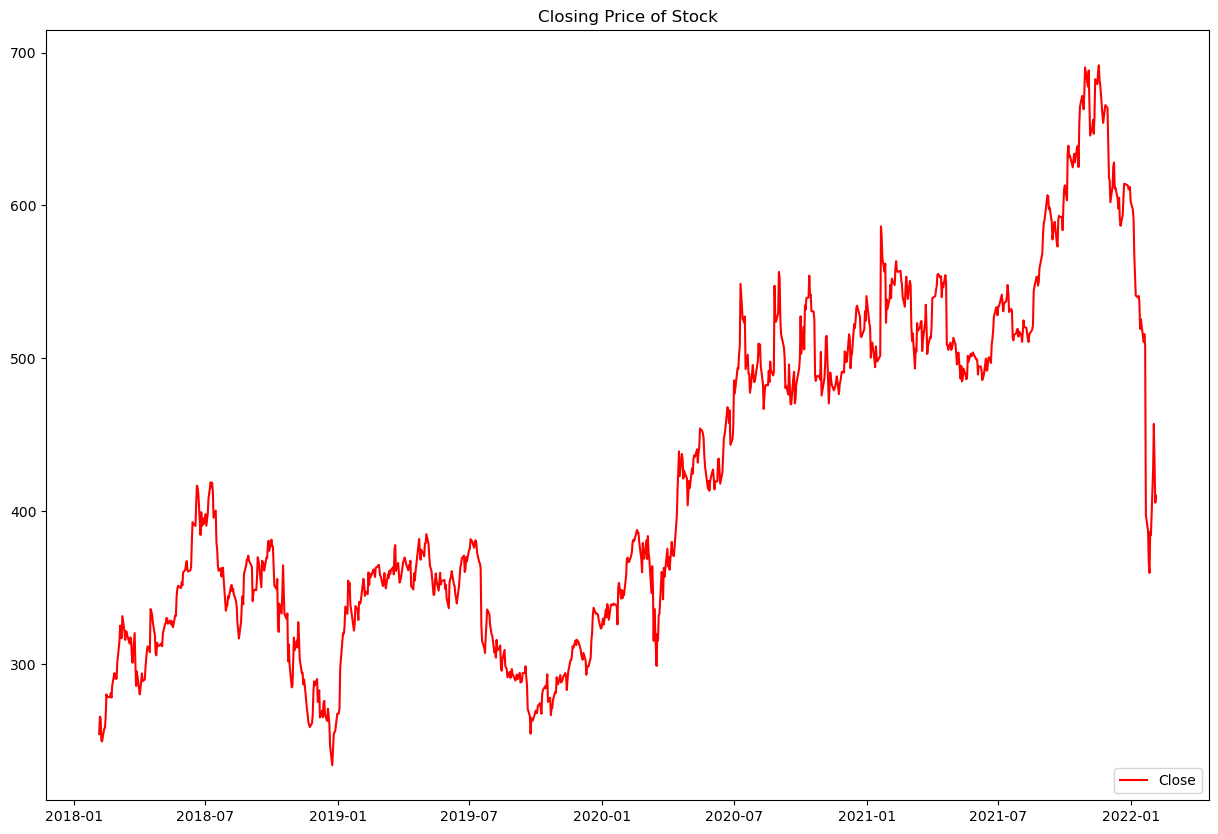

In [28]:
style()
plt.title('Closing Price of Stock', color="black")
plt.plot(copy.Date, copy.Close, color="#FF0000")
plt.legend(["Close"], loc ="lower right", facecolor='white', labelcolor='black')

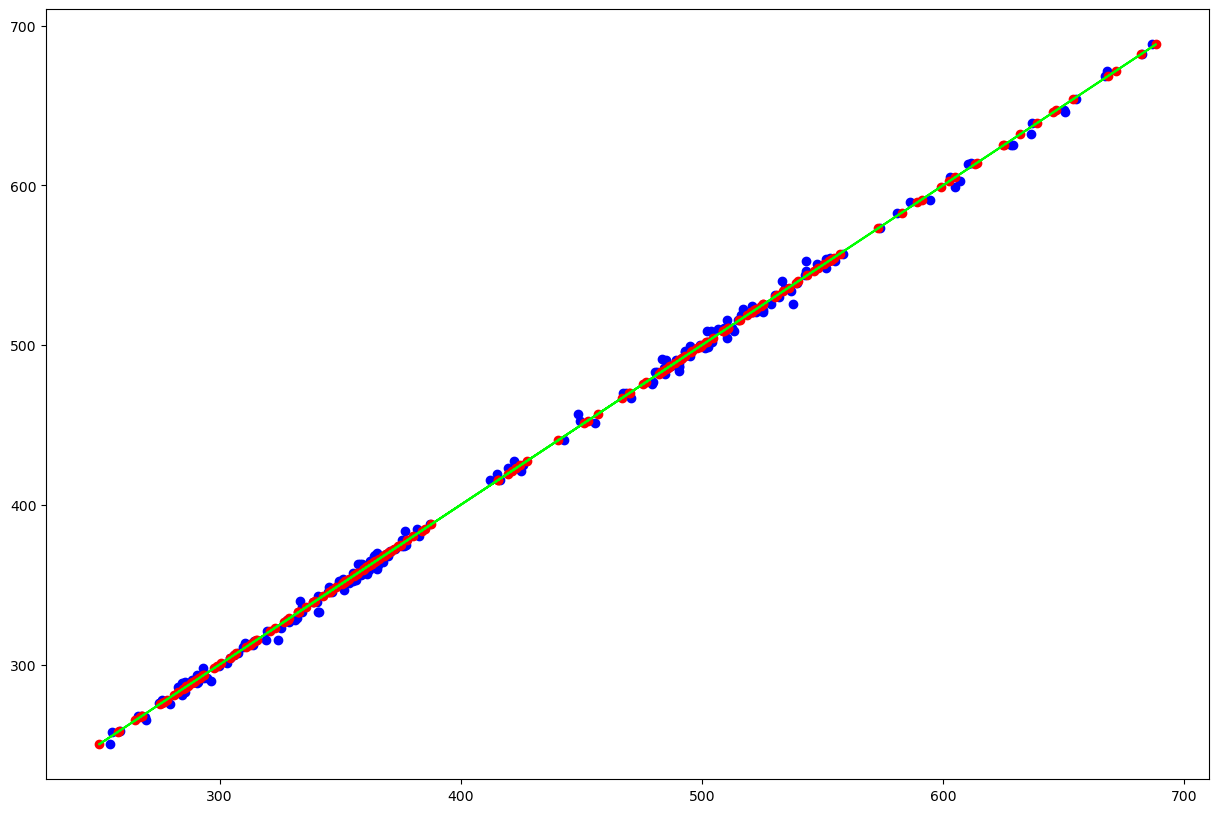

In [31]:
style()
plt.scatter(y_prediction, y_testing, color='blue', marker='o')
plt.scatter(y_testing, y_testing, color='red')
plt.plot(y_testing, y_testing, color='lime')

In [32]:
test_prediction['Close_Prediction'] = y_prediction
test_prediction

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
27,2018-03-15,323.170013,323.399994,318.140015,321.089996,321.089996,5642900,319.524520
349,2019-06-26,361.600006,366.790009,361.600006,362.200012,362.200012,3669700,365.686532
362,2019-07-16,370.089996,371.339996,364.920013,365.989990,365.989990,5863200,367.170874
35,2018-03-27,322.489990,322.899994,297.000000,300.690002,300.690002,12068600,303.295924
43,2018-04-09,291.769989,299.549988,289.119995,289.929993,289.929993,9853600,296.282252
...,...,...,...,...,...,...,...,...
638,2020-08-18,484.350006,495.299988,482.799988,491.869995,491.869995,3505500,491.761564
417,2019-10-02,263.609985,269.350006,262.190002,268.029999,268.029999,7659100,267.300619
707,2020-11-24,478.839996,484.049988,475.890015,482.880005,482.880005,3550500,480.637203
127,2018-08-07,353.230011,357.309998,349.010010,351.829987,351.829987,7970900,353.457341


In [33]:
test_prediction[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,422.660395,111.433500,250.100006,332.710006,376.500000,510.134995,688.289978
Close_Prediction,202.0,422.828961,111.277557,254.405422,334.008603,376.742172,510.051182,686.805646


In [34]:
test_prediction['Date'] = pd.to_datetime(test_prediction['Date'],format='%Y-%m-%d')

In [39]:
result = pd.DataFrame(test_prediction[['Date', 'Close', 'Close_Prediction']])
result = result.reset_index()
result = result.drop('index',axis=1)
result.set_index('Date', inplace=True)
result =  result.asfreq('D')
result

,Close,Close_Prediction
Date,,
2018-02-08,250.100006,254.405422
2018-02-09,NaN,NaN
2018-02-10,NaN,NaN
2018-02-11,NaN,NaN
2018-02-12,257.950012,255.532353
...,...,...
2022-01-28,NaN,NaN
2022-01-29,NaN,NaN
2022-01-30,NaN,NaN


In [38]:
result.to_csv('Prediction_of_Close.csv', index=True)